In [37]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import LabelEncoder

!pip install unidecode
!pip install openpyxl

import pandas as pd
from pandas import read_excel
import numpy as np
import re
from re import sub
import multiprocessing
from unidecode import unidecode
import os
from time import time 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Embedding, Flatten, Conv1D, BatchNormalization
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import tensorflow.keras.backend as K
import h5py
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
from google.colab import drive

In [39]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
data = pd.read_csv('/content/drive/MyDrive/ start/OTT Content Reviews.xlsx - Sheet1 (3).csv', encoding='UTF-8')

In [41]:
data

,Text,Label
0,"পুরাই অস্থির!!! ""সাকিল, চট্টগ্রাম",1
1,নাজিফা তুষি আপু অবিনয় টা বেস্ট ছিল ওনার জন্য ক...,1
2,পুরাই আগুন অনেক দিনের অপেক্ষায় আছি এই কাজ টা দ...,1
3,"ইন্টারেস্টিং স্টোরি,অভিনয়, সিনেমেটোগ্রাফিও জোস",1
4,এট লিস্ট অনন্ত জলীল এর ১০০ কোটি টাকার মুভির ট্...,1
...,...,...
6695,"অযথা সময় নষ্ট,এটা কোনো নাটক",2
6696,একটুকুও ভাল লাগেনাই,2
6697,এসব নষ্টা নাটক দেখে মানুষের চরিত্র খারাপ হয়,2
6698,টিপু ওয়ালা আপু মনোজ এর জন‍্য একটা সুন্দরী একটা...,2


In [42]:
len(data.Label.value_counts())

3

In [43]:
data.Label.unique()

array([1, 0, 2])

In [44]:
data.isnull().sum()

Text     0
Label    0
dtype: int64

In [45]:
data.shape

(6700, 2)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


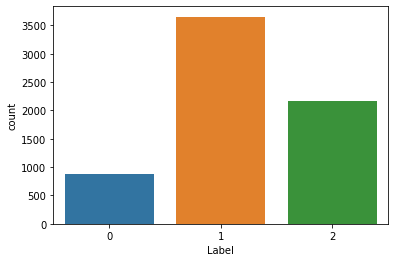

In [46]:
sns.countplot(data['Label'])

In [47]:
print("Total Reviews:",len(data),
      "\nTotal positive Reviews:",len(data[data.Label ==1]),
      "\nTotal negative Reviews:",len(data[data.Label==2]),
      "\nTotal neutral Reviews:",len(data[data.Label ==0]))

Total Reviews: 6700 
Total positive Reviews: 3655 
Total negative Reviews: 2166 
Total neutral Reviews: 879


In [48]:
data.columns

Index(['Text', 'Label'], dtype='object')

In [49]:
def text_to_word_list(text):
    text = text.split()
    return text

def replace_strings(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           u"\u00C0-\u017F"          #latin
                           u"\u2000-\u206F"          #generalPunctuations
                               
                           "]+", flags=re.UNICODE)
    english_pattern=re.compile('[a-zA-Z0-9]+', flags=re.I)
    #latin_pattern=re.compile('[A-Za-z\u00C0-\u00D6\u00D8-\u00f6\u00f8-\u00ff\s]*',)
    
    text=emoji_pattern.sub(r'', text)
    text=english_pattern.sub(r'', text)

    return text

def remove_punctuations(my_str):
    # define punctuation
    punctuations = '''````£|¢|Ñ+-*/=EROero৳০১২৩৪৫৬৭৮৯012–34567•89।!()-[]{};:'"“\’,<>./?@#$%^&*_~‘—॥”‰⚽️✌�￰৷￰'''
    
    no_punct = ""
    for char in my_str:
        if char not in punctuations:
            no_punct = no_punct + char

    # display the unpunctuated string
    return no_punct



def joining(text):
    out=' '.join(text)
    return out

def preprocessing(text):
    out=remove_punctuations(replace_strings(text))
    return out

In [50]:
data['Text'] = data.Text.apply(lambda x: preprocessing(str(x)))

In [51]:
data.reset_index(drop=True, inplace=True)


In [52]:
enc = LabelEncoder()
data['Label'] = enc.fit_transform(data['Label'])

In [53]:
train1, test1 = train_test_split(data,random_state=69, test_size=0.2)
training_sentences_cricket = []
testing_sentences_cricket = []



train_sentences_cricket=train1['Text'].values
train_labels_cricket=train1['Label'].values
for i in range(train_sentences_cricket.shape[0]): 
    #print(train_sentences[i])
    x=str(train_sentences_cricket[i])
    training_sentences_cricket.append(x)
    
training_sentences_cricket=np.array(training_sentences_cricket)





test_sentences_cricket=test1['Text'].values
test_labels_cricket=test1['Label'].values

for i in range(test_sentences_cricket.shape[0]): 
    x=str(test_sentences_cricket[i])
    testing_sentences_cricket.append(x)
    
testing_sentences_cricket=np.array(testing_sentences_cricket)


train_labels_cricket=tf.keras.utils.to_categorical(train_labels_cricket)


test_labels_cricket=tf.keras.utils.to_categorical(test_labels_cricket)
print("Training Set Length: "+str(len(train1)))
print("Testing Set Length: "+str(len(test1)))
print("training_sentences shape: "+str(training_sentences_cricket.shape))
print("testing_sentences shape: "+str(testing_sentences_cricket.shape))
print("train_labels shape: "+str(train_labels_cricket.shape))
print("test_labels shape: "+str(test_labels_cricket.shape))

Training Set Length: 5360
Testing Set Length: 1340
training_sentences shape: (5360,)
testing_sentences shape: (1340,)
train_labels shape: (5360, 3)
test_labels shape: (1340, 3)


In [54]:
print(training_sentences_cricket[1])
print(train_labels_cricket[0])

ট্রেইলরটা ভালো কিন্তু কাহিনী টা ভালো লাগে নাই বুঝলাম না গোয়েন্দা রহস্য উদঘাটন না করে ডাক্তার কেনো রহস্য উদঘাটন করতেসে আরো অনেক উইকনেস আসে গল্পে সময় নষ্ট হলো
[0. 1. 0.]


In [55]:
vocab_size = len(training_sentences_cricket)+1
embedding_dim = 100
max_length = 100
trunc_type='post'
oov_tok = ""

In [56]:
print(training_sentences_cricket.shape)
print(train_labels_cricket.shape)

(5360,)
(5360, 3)


In [57]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences_cricket)
word_index = tokenizer.word_index
print(len(word_index))
print("Word index length:"+str(len(tokenizer.word_index)))
sequences = tokenizer.texts_to_sequences(training_sentences_cricket)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)


test_sequences = tokenizer.texts_to_sequences(testing_sentences_cricket)
testing_padded = pad_sequences(test_sequences,maxlen=max_length)

10525
Word index length:10525


In [58]:
print("Sentence :--> \n")
print(training_sentences_cricket[2]+"\n")
print("Sentence Tokenized and Converted into Sequence :--> \n")
print(str(sequences[2])+"\n")
print("After Padding the Sequence with padding length 100 :--> \n")
print(padded[2])

Sentence :--> 

এই বাচ্চা বাচ্চা ছেলেগুলো এত বড় হয়ে গেল কবে  
আর ওই মেয়েগুলো তো ওদের চেয়ে বয়সে বড় হবে মনে হয় 

Sentence Tokenized and Converted into Sequence :--> 

[4, 430, 430, 2721, 44, 157, 46, 164, 113, 5, 410, 4312, 31, 550, 327, 1216, 157, 22, 24, 30]

After Padding the Sequence with padding length 100 :--> 

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    4  430  430 2721
   44  157   46  164  113    5  410 4312   31  550  327 1216  157   22
   24   30]


In [59]:
print("Padded shape(training): "+str(padded.shape))
print("Padded shape(testing): "+str(testing_padded.shape))

Padded shape(training): (5360, 100)
Padded shape(testing): (1340, 100)


In [60]:
def precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def f1_score(y_true, y_pred):
    pr = precision(y_true, y_pred)
    rec = recall(y_true, y_pred)
    f1_score = 2 * (pr * rec) / (pr + rec)
    return f1_score

In [61]:
# padded
train_labels_cricket

array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [62]:
# raise NotImplementedError()

In [63]:
# from tensorflow.keras.layers import GlobalMaxPooling1D

detection=Sequential()

detection.add(Embedding(vocab_size, embedding_dim, input_length=max_length))

#1 -convolutional layer-1
detection.add(Conv1D(64 ,kernel_size=3))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
# detection.add(GlobalMaxPooling1D())
detection.add(Dropout(0.1))

#2 -convolutional layer-2
detection.add(Conv1D(96,kernel_size=3))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
# detection.add(GlobalMaxPooling1D())
# detection.add(Dropout(0.2))

#2 -convolutional layer-2
detection.add(Conv1D(128,kernel_size=3))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
# detection.add(GlobalMaxPooling1D())
detection.add(Dropout(0.15))


# #2 -convolutional layer-2
# detection.add(Conv1D(256,kernel_size=3))
# detection.add(BatchNormalization())
# detection.add(Activation('relu'))
# # detection.add(MaxPooling2D(pool_size=(2,2)))
# # detection.add(GlobalMaxPooling1D())
# detection.add(Dropout(0.2))

# #3 -convolutional layer-3
# detection.add(Conv1D(384,kernel_size=3))
# detection.add(BatchNormalization())
# detection.add(Activation('relu'))
# # detection.add(GlobalMaxPooling1D())
# # detection.add(MaxPooling2D(pool_size=(2,2)))
# # detection.add(UpSampling2D(input_shape=(512, 3, 3)))
# detection.add(Dropout(0.2))

# #3 -convolutional layer-3
# detection.add(Conv1D(512,kernel_size=3))
# detection.add(BatchNormalization())
# detection.add(Activation('relu'))
# # detection.add(GlobalMaxPooling1D())
# # detection.add(MaxPooling2D(pool_size=(2,2)))
# # detection.add(UpSampling2D(input_shape=(512, 3, 3)))
# detection.add(Dropout(0.3))


# detection.add(Flatten())
# detection.add(Dense(512))
# detection.add(BatchNormalization())
# detection.add(Activation('relu'))

# detection.add(Flatten())
# detection.add(Dense(256))
# detection.add(BatchNormalization())
# detection.add(Activation('relu'))

detection.add(Flatten())
detection.add(Dense(128))
detection.add(BatchNormalization())
detection.add(Activation('relu'))

detection.add(Flatten())
detection.add(Dense(64))
detection.add(BatchNormalization())
detection.add(Activation('relu'))

detection.add(Dense(3,activation='sigmoid'))
optimum=Adam(lr=0.00001)
detection.summary()
detection.compile(optimizer=optimum,loss='binary_crossentropy',metrics=['accuracy', precision, recall])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          536100    
                                                                 
 conv1d_3 (Conv1D)           (None, 98, 64)            19264     
                                                                 
 batch_normalization_5 (Batc  (None, 98, 64)           256       
 hNormalization)                                                 
                                                                 
 activation_5 (Activation)   (None, 98, 64)            0         
                                                                 
 dropout_2 (Dropout)         (None, 98, 64)            0         
                                                                 
 conv1d_4 (Conv1D)           (None, 96, 96)            18528     
                                                      

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [64]:
from sklearn.model_selection import train_test_split

# Split the data
x_train, x_valid, y_train, y_valid = train_test_split(padded, train_labels_cricket, test_size=0.15, shuffle= True) #data, label

In [65]:
model_cricket = detection.fit(x_train, y_train,shuffle=True,epochs=30,batch_size=4,validation_data=(x_valid,y_valid))#,use_multiprocessing=True, workers=8)
# model_cricket=detection.fit(padded,train_labels_cricket,shuffle=True,epochs=30,batch_size=16,validation_data=(testing_padded,test_labels_cricket),use_mult

Epoch 1/30
1139/1139 [==============================] - 64s 54ms/step - loss: 0.9141 - accuracy: 0.3036 - precision: 0.3249 - recall: 0.7766 - val_loss: 0.8759 - val_accuracy: 0.3047 - val_precision: 0.3272 - val_recall: 0.6928
Epoch 2/30
1139/1139 [==============================] - 42s 37ms/step - loss: 0.8246 - accuracy: 0.3674 - precision: 0.3420 - recall: 0.7309 - val_loss: 0.8248 - val_accuracy: 0.3918 - val_precision: 0.3436 - val_recall: 0.7027
Epoch 3/30
1139/1139 [==============================] - 43s 38ms/step - loss: 0.7607 - accuracy: 0.4010 - precision: 0.3599 - recall: 0.6743 - val_loss: 0.7440 - val_accuracy: 0.4080 - val_precision: 0.3760 - val_recall: 0.6269
Epoch 4/30
1139/1139 [==============================] - 43s 38ms/step - loss: 0.7064 - accuracy: 0.4489 - precision: 0.3927 - recall: 0.6242 - val_loss: 0.7055 - val_accuracy: 0.4490 - val_precision: 0.4121 - val_recall: 0.5970
Epoch 5/30
1139/1139 [==============================] - 43s 38ms/step - loss: 0.6655 - a

In [66]:
detection.evaluate(x=testing_padded,y=test_labels_cricket,verbose=1)
# loss: - accuracy: - recall:  - precision:

42/42 [==============================] - 1s 18ms/step - loss: 0.4787 - accuracy: 0.6806 - precision: 0.7224 - recall: 0.5454


[0.47872287034988403,
 0.6805970072746277,
 0.7223626375198364,
 0.5453869104385376]

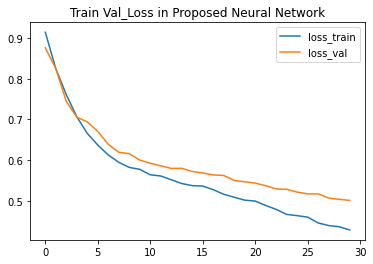

<Figure size 432x288 with 0 Axes>

In [67]:
plt.plot(model_cricket.history['loss'], label='loss_train')
plt.plot(model_cricket.history['val_loss'], label='loss_val')
# plt.plot(mod.history['accuracy'], label='acc_train')
# plt.plot(mod.history['val_accuracy'], label='acc_val')
plt.legend()
plt.title('Train Val_Loss in Proposed Neural Network')
plt.show()
plt.savefig('LossVal_Loss')

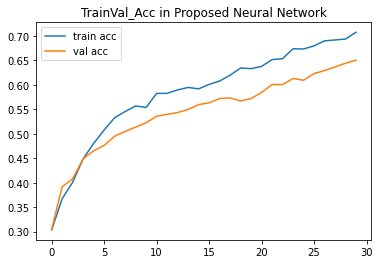

<Figure size 432x288 with 0 Axes>

In [68]:
plt.plot(model_cricket.history['accuracy'], label='train acc')
plt.plot(model_cricket.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('TrainVal_Acc in Proposed Neural Network')
plt.show()
plt.savefig('AccVal_Acc')
